  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   

   Shell weight  Rings  
0         0.070      7  
1         0.210      9  
2         0.155     10  
3         0.055      7  
4         0.120      8  
   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0  NaN   0.350     0.265   0.090        0.2255          0.0995   
1  NaN   0.530     0.420   0.135        0.6770          0.2565   
2  NaN   0.440     0.365   0.125        0.5160          0.2155   
3  NaN   0.330     0.255   0.080        0.2050          0.0895   
4  NaN   0.425     0.300   0.095 

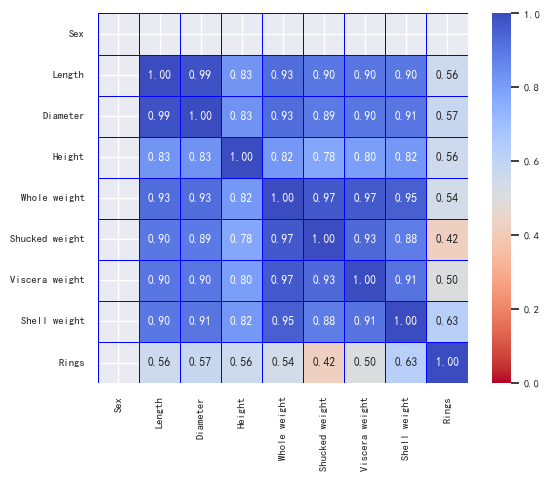

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data_path = "E:\\Projects\\math5836\\Assessment2\\abalone\\abalone.data"
abalone = pd.read_csv(data_path)
abalone.columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

print(abalone.head(5))
# Data processing: Convert M and F to 0 and 1
# abalone['Sex'] = abalone['Sex'].map({'M': 0, 'F': 1,"I":-1})
# abalone['Sex']= pd.Categorical(abalone['Sex'],ca)
# abalone['Sex'] = abalone['Sex'].replace({'M': 0, 'F': 1,"I":-1})
print(abalone.head(5))

# Correlation map
correlation_matrix = abalone.corr().round(3)
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(font_scale=0.7,rc=rc)  # 设置字体大小
sns.heatmap(correlation_matrix,
            annot=True,  # 显示相关系数的数据
            center=0.5,  # 居中
            fmt='.2f',  # 只显示两位小数
            linewidth=0.5,  # 设置每个单元格的距离
            linecolor='blue',  # 设置间距线的颜色
            vmin=0, vmax=1,  # 设置数值最小值和最大值
            xticklabels=True, yticklabels=True,  # 显示x轴和y轴
            square=True,  # 每个方格都是正方形
            cbar=True,  # 绘制颜色条
            cmap='coolwarm_r',  # 设置热力图颜色
            )
plt.savefig("Corr.png",dpi=600)#保存图片，分辨率为600
# plt.close()


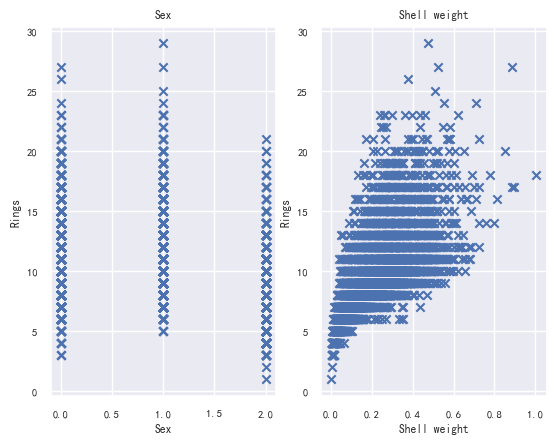

In [20]:
# 散点图绘制
features = ['Sex', 'Shell weight']
target = abalone['Rings']
for i, col in enumerate(features): 
    plt.subplot(1, len(features) , i+1) 
    x = abalone[col]
    y = target
    plt.scatter(x, y, marker='x')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Rings')
    plt.savefig('feature.png')

Text(0, 0.5, 'Frequency')

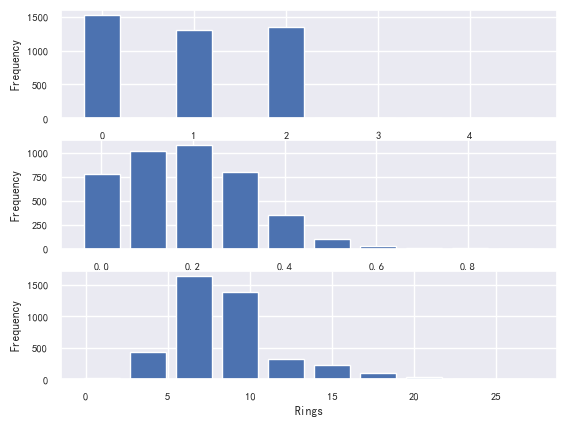

In [30]:
# Plot histogram
features = ['Sex', 'Shell weight','Rings']
plt.subplot(3,1,1)
plt.hist(abalone['Sex'],rwidth=0.8,range=(0,5),align='left')
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.subplot(3,1,2)
plt.hist(abalone['Shell weight'],rwidth=0.8,align='left')
plt.xlabel("Shell weight")
plt.ylabel("Frequency")
plt.subplot(3,1,3)
plt.hist(abalone['Rings'],rwidth=0.8,align='left')
plt.xlabel("Rings")
plt.ylabel("Frequency")

The model performance for training set
--------------------------------------
RMSE is 2.1833796139305606
R2 score is 0.5367051507274745
RMSE is 0.03299568720273717
R2 score is 0.008500058366127479


The model performance for testing set
--------------------------------------
RMSE is 2.236275587230973
R2 score is 0.5247459967711374
RMSE is 0.05543747140526427
R2 score is 0.015039597209257823


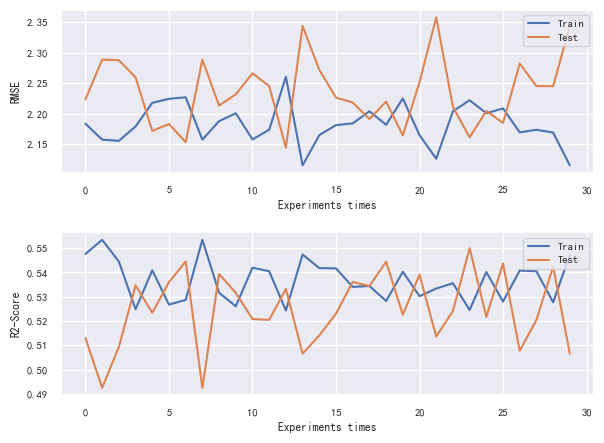

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
import numpy as np
from random import randint
# 模型训练
train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

for i in range(30):
    random_state = randint(i,200)
    feature_vars = ['Sex' ,'Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
    X_train, X_test, Y_train, Y_test = train_test_split(abalone[feature_vars], abalone['Rings'], test_size = 0.4, random_state=random_state)
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    train_r2 = r2_score(Y_train, y_train_predict)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2) 
    # 模型测试
    y_test_predict = lin_model.predict(X_test)
    test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict))) 
    test_r2 = r2_score(Y_test, y_test_predict)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2) 
fig,axs = plt.subplots(2)
fig.tight_layout(pad=3.0)
axs[0].plot(np.array(train_rmse_list))
axs[0].plot(np.array(test_rmse_list))
axs[0].legend(labels=["Train","Test"],loc="upper right")
axs[0].set(xlabel='Experiments times',ylabel='RMSE')

axs[1].plot(np.array(train_r2_list))
axs[1].plot(np.array(test_r2_list))
axs[1].set(xlabel='Experiments times',ylabel='R2-Score')
axs[1].legend(labels=["Train","Test"],loc="upper right")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(np.array(train_rmse_list).mean()))
print('R2 score is {}'.format(np.array(train_r2_list).mean()))
print('RMSE is {}'.format(np.array(train_rmse_list).std()))
print('R2 score is {}'.format(np.array(train_r2_list).std()))
print("\n")
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(np.array(test_rmse_list).mean()))
print('R2 score is {}'.format(np.array(test_r2_list).mean()))
print('RMSE is {}'.format(np.array(test_rmse_list).std()))
print('R2 score is {}'.format(np.array(test_r2_list).std()))

The model performance for training set
--------------------------------------
RMSE is 2.189672053856206
R2 score is 0.5397250231806939


The model performance for testing set
--------------------------------------
RMSE is 3.7193455718673945
R2 score is -0.47223869338329405


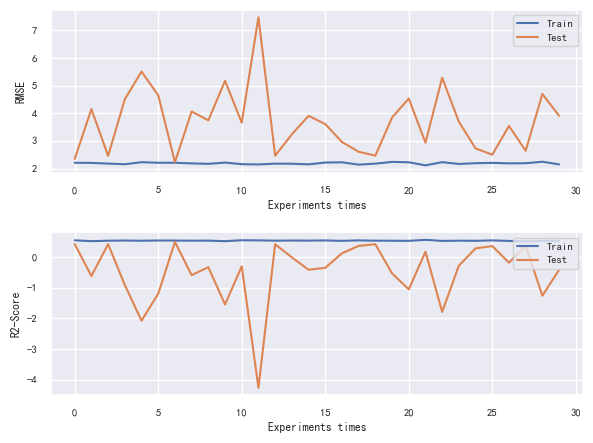

In [6]:
from sklearn import preprocessing
from random import randint
# 特征正则化
# 模型训练
train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []
for i in range(30):
    feature_vars = ['Sex' ,'Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
    random_state = randint(i,200)
    X_train, X_test, Y_train, Y_test = train_test_split(abalone[feature_vars], abalone['Rings'], test_size = 0.4, random_state=random_state)
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_minmax = min_max_scaler.fit_transform(X_train)
    lin_model = LinearRegression()
    # 正则化数据训练模型
    lin_model.fit(X_train_minmax, Y_train)
    # 模型预测
    y_train_predict = lin_model.predict(X_train_minmax)
    train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict))) 
    train_r2 = r2_score(Y_train, y_train_predict)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2) 
    # 训练时进行了特征正则化，在测试时，特征需要做同样的操作
    X_test_minmax = min_max_scaler.fit_transform(X_test)
    y_test_predict = lin_model.predict(X_test_minmax)
    test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict))) 
    test_r2 = r2_score(Y_test, y_test_predict)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2) 

fig,axs = plt.subplots(2)
fig.tight_layout(pad=3.0)
axs[0].plot(np.array(train_rmse_list))
axs[0].plot(np.array(test_rmse_list))
axs[0].legend(labels=["Train","Test"],loc="upper right")
axs[0].set(xlabel='Experiments times',ylabel='RMSE')
axs[1].plot(np.array(train_r2_list))
axs[1].plot(np.array(test_r2_list))
axs[1].set(xlabel='Experiments times',ylabel='R2-Score')
axs[1].legend(labels=["Train","Test"],loc="upper right")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(np.array(train_rmse_list).mean()))
print('R2 score is {}'.format(np.array(train_r2_list).mean()))
print("\n")
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(np.array(test_rmse_list).mean()))
print('R2 score is {}'.format(np.array(test_r2_list).mean()))

The model performance for training set
--------------------------------------
RMSE is 2.4869731547883087
R2 score is 0.40120586207264675


The model performance for testing set
--------------------------------------
RMSE is 2.5076974465101456
R2 score is 0.3988134043551635


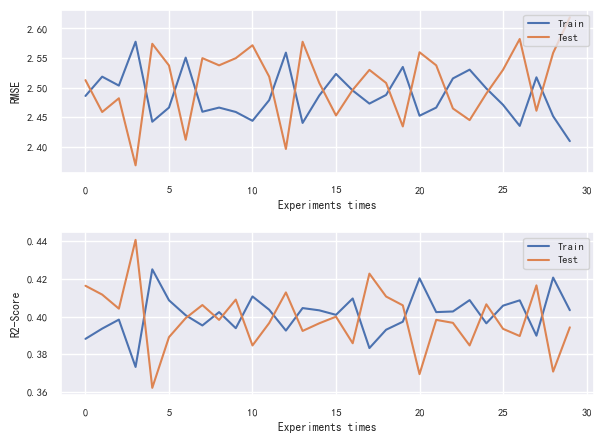

In [7]:
X = abalone[['Sex' ,'Shell weight']]
Y = abalone['Rings']
train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []
for i in range(30):
    random_state = randint(i,200)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=random_state)
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict))) 
    train_r2 = r2_score(Y_train, y_train_predict)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2) 
    # 模型测试
    y_test_predict = lin_model.predict(X_test)
    test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict))) 
    test_r2 = r2_score(Y_test, y_test_predict)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
fig,axs = plt.subplots(2)
fig.tight_layout(pad=3.0)
axs[0].plot(np.array(train_rmse_list))
axs[0].plot(np.array(test_rmse_list))
axs[0].legend(labels=["Train","Test"],loc="upper right")
axs[0].set(xlabel='Experiments times',ylabel='RMSE')

axs[1].plot(np.array(train_r2_list))
axs[1].plot(np.array(test_r2_list))
axs[1].set(xlabel='Experiments times',ylabel='R2-Score')
axs[1].legend(labels=["Train","Test"],loc="upper right")   
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(np.array(train_rmse_list).mean()))
print('R2 score is {}'.format(np.array(train_r2_list).mean()))
print("\n")
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(np.array(test_rmse_list).mean()))
print('R2 score is {}'.format(np.array(test_r2_list).mean()))

The model performance for training set
--------------------------------------
RMSE is 2.088409426790124
R2 score is 0.5904348200742857


The model performance for testing set
--------------------------------------
RMSE is 2.065761115042049
R2 score is 0.5712200781864408


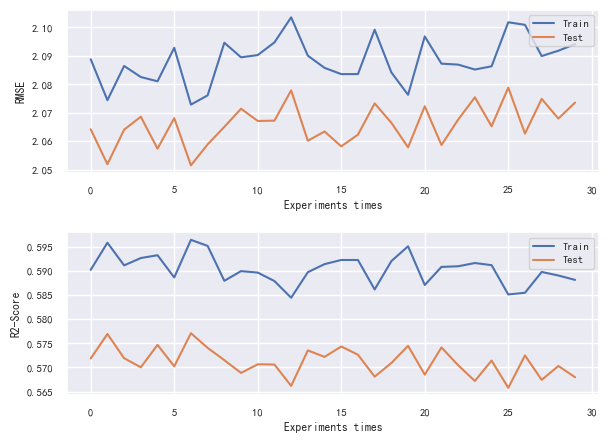

In [10]:
# Training the Model
from sklearn.neural_network import MLPRegressor
# 
X = abalone[['Sex' ,'Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]
Y = abalone['Rings']
train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []
for i in range(30):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=30)
    # creating an classifier from the model:
    mlp = MLPRegressor(hidden_layer_sizes=(100, 15), max_iter=1000,learning_rate="adaptive",solver="sgd",activation="tanh") 
    # let's fit the training data to our model
    mlp.fit(X_train.values, Y_train.values)
    y_train_predict = mlp.predict(X_train.values)
    train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict))) 
    train_r2 = r2_score(Y_train, y_train_predict)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2)
    # 模型测试
    y_test_predict = mlp.predict(X_test.values)
    test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict))) 
    test_r2 = r2_score(Y_test, y_test_predict)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
fig,axs = plt.subplots(2)
fig.tight_layout(pad=3.0)
axs[0].plot(np.array(train_rmse_list))
axs[0].plot(np.array(test_rmse_list))
axs[0].legend(labels=["Train","Test"],loc="upper right")
axs[0].set(xlabel='Experiments times',ylabel='RMSE')

axs[1].plot(np.array(train_r2_list))
axs[1].plot(np.array(test_r2_list))
axs[1].set(xlabel='Experiments times',ylabel='R2-Score')
axs[1].legend(labels=["Train","Test"],loc="upper right")   
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(np.array(train_rmse_list).mean()))
print('R2 score is {}'.format(np.array(train_r2_list).mean()))
print("\n")
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(np.array(test_rmse_list).mean()))
print('R2 score is {}'.format(np.array(test_r2_list).mean()))